# Element mass matrix for piecewise linear finite elements

We want to calculate the element mass matrices for piecewise linear finite triangular elements. Let $\hat K$ be the reference element defined by the three corner points $(0,0)$, $(1,0)$, $(0,1)$.

The basis function on the reference element $\hat K$ are given by
$$
\begin{align*}
N_0(\xi) &= 1 - \xi_1 - \xi_2 \; ,\\
N_1(\xi) &= \xi_1 \; ,\\
N_2(\xi) &= \xi_2 \; .
\end{align*}
$$

Let $F_K: \hat K \to K$, $\xi \mapsto P_0 + J_K \xi$ be the usual affine tranformation. Since
$$
(M_K)_{i,j} = \int_K N_i(F_K^{-1}(x)) N_j(F_K^{-1}(x)) \; \mathrm dx
= \int_{\hat K} N_i(\xi) N_j(\xi) |\det J_J| \; \mathrm d\xi \; ,
$$
we have
$$
M_K = M_{\hat K} |\det J_K| \; , \quad \text{where } M_{\hat K} = \int_{\hat K} N_i(\xi) N_j(\xi) \; \mathrm d\xi \; ,
$$
so it's enough to calculate $M_{\hat K}$.

In [1]:
from sympy import *
init_printing()

In [2]:
xi_1, xi_2 = symbols('xi_1  xi_2')

In [3]:
N0 = 1 - xi_1 - xi_2
N1 = xi_1
N2 = xi_2
basis = (N0, N1, N2)

In [4]:
rows = []
for c in range(3):
    row = []
    for r in range(3):
        row.append(integrate(basis[c]*basis[r], (xi_2, 0, 1-xi_1), (xi_1, 0, 1)))
    rows.append(row)
M_Kref = Matrix(rows)
g = gcd(tuple(M_Kref))
M_Kref = MatMul(g, M_Kref/g, evaluate=False)

The element mass matrix $M_{\hat K}$ for the reference element $\hat K$ is given by

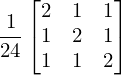

In [5]:
M_Kref